**Import the relevant libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter

warnings.filterwarnings('ignore')

**load the data**

In [5]:
raw_data = pd.read_csv(r'C:\Users\user\Downloads\cleaned_startup_data.xls')
raw_data

,company_id,category_code,country_code,state_code,total_rounds,average_participants,offices,ipo,is_acquired,is_closed,age_years,status,log_average_funded
0,c:10015,health,USA,California,5,3.8,1.0,0,0,0,6.26,0,16.426597
1,c:100228,education,USA,other,1,0.0,3.0,0,0,0,3.25,0,11.512925
2,c:100607,games_video,USA,California,1,1.0,1.0,0,0,0,3.00,0,10.596635
3,c:10075,web,USA,California,1,0.0,1.0,0,0,0,6.15,0,12.765688
4,c:100756,education,other,other,1,1.0,1.0,0,0,0,5.00,0,13.234838
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7505,c:99669,enterprise,USA,other,1,6.0,1.0,0,0,0,3.00,0,13.527828
7506,c:9975,web,other,other,1,0.0,1.0,0,0,0,6.30,0,13.590714
7507,c:9977,mobile,USA,California,1,0.0,1.0,0,0,1,5.62,0,11.775290
7508,c:9995,public_relations,USA,California,1,0.0,1.0,0,0,0,6.17,0,13.527828


In [6]:
#drop offices and is_acquired 
columns_to_drop = ['offices', 'is_acquired']

In [7]:
data = raw_data.drop(columns=columns_to_drop)
data

,company_id,category_code,country_code,state_code,total_rounds,average_participants,ipo,is_closed,age_years,status,log_average_funded
0,c:10015,health,USA,California,5,3.8,0,0,6.26,0,16.426597
1,c:100228,education,USA,other,1,0.0,0,0,3.25,0,11.512925
2,c:100607,games_video,USA,California,1,1.0,0,0,3.00,0,10.596635
3,c:10075,web,USA,California,1,0.0,0,0,6.15,0,12.765688
4,c:100756,education,other,other,1,1.0,0,0,5.00,0,13.234838
...,...,...,...,...,...,...,...,...,...,...,...
7505,c:99669,enterprise,USA,other,1,6.0,0,0,3.00,0,13.527828
7506,c:9975,web,other,other,1,0.0,0,0,6.30,0,13.590714
7507,c:9977,mobile,USA,California,1,0.0,0,1,5.62,0,11.775290
7508,c:9995,public_relations,USA,California,1,0.0,0,0,6.17,0,13.527828


**Declare the features and target**

In [9]:
#declare the features and target
target = data['status']
features = data[['total_rounds', 'average_participants', 'ipo', 'is_closed', 'age_years', 'log_average_funded']]

**Split data into test and training**

In [11]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, stratify=target, random_state=42)

**Create the SMOTE object**

In [13]:
smote = SMOTE(random_state=42)

In [14]:
# Apply SMOTE to the training features and labels
x_train_sm, y_train_sm = smote.fit_resample(x_train, y_train)

**Create the Random Forest**

In [26]:
#initialize with a basic configuration
rf_model = RandomForestClassifier(random_state=42)

In [28]:
#fit the model to the training data
rf_model.fit(x_train_sm, y_train_sm)

RandomForestClassifier(random_state=42)

**Make prediction on the test set**

In [31]:
y_pred_rf = rf_model.predict(x_test)

**Confusion Matrix**

In [36]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix - Random Forest")
print(cm)

Confusion Matrix - Random Forest
[[1244  127]
 [  61   70]]


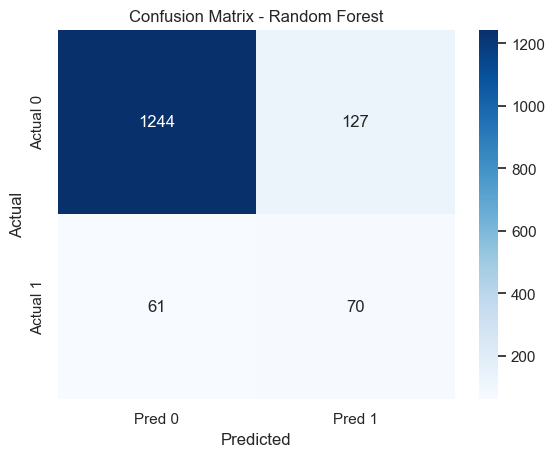

In [40]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

**Model accuracy in percentage**

In [44]:
cm1 = np.array(cm)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.8748335552596538

**Classification Report**

In [46]:
# Generate the report as a dictionary
report_dict = classification_report(y_test, y_pred_rf, output_dict=True, target_names=['failure', 'success'])

# Convert to a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Round for cleaner display
report_df = report_df.round(3)

# Show the table
report_df

,precision,recall,f1-score,support
failure,0.953,0.907,0.930,1371.000
success,0.355,0.534,0.427,131.000
accuracy,0.875,0.875,0.875,0.875
macro avg,0.654,0.721,0.678,1502.000
weighted avg,0.901,0.875,0.886,1502.000


**Create a Feature Importance Chart**

In [49]:
feature_names = ['total_rounds', 'average_participants', 'ipo', 'is_closed', 'age_years', 'log_average_funded']

In [51]:
#simulate the random forest classifier
np.random.seed(0)
rf_model.feature_importances = np.random.rand(len(feature_names))

In [53]:
#create the dataframe for plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances
}).sort_values(by='Importance', ascending=False)

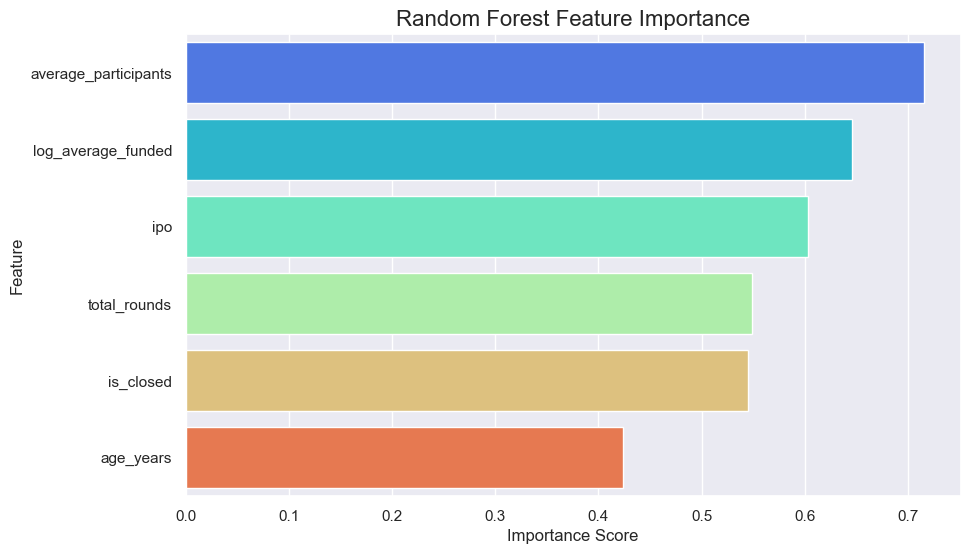

In [61]:
#create the plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='rainbow')
plt.title('Random Forest Feature Importance', fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()